# Cover Tree Quote conversion Prediction Model [Undersampling version]

<img src = "https://mms.businesswire.com/media/20220919005204/en/1574993/23/Group-4204-1024x264.jpg" width="300" height="150">

>[Cover Tree Quote conversion Prediction Model [Undersampling version]](#scrollTo=AnDdNMz9Q8M4)

>[Problem Statement and Vision](#scrollTo=sGFnvbZMmKwm)

>>[What are we trying to solve?](#scrollTo=sGFnvbZMmKwm)

>>[Agenda](#scrollTo=sGFnvbZMmKwm)

>>[Goal](#scrollTo=sGFnvbZMmKwm)

>[Import Libraries](#scrollTo=sjnHqWCkebd4)

>[Function to calculate metrics: prediction, accuracy score, recall and precision score.](#scrollTo=GHm5zglTiXcd)

>[Import Dataset](#scrollTo=KfxDEt7LegJ9)

>[Exploratory Data Analysis](#scrollTo=69sqWCZaekcZ)

>[Data Preprocessing](#scrollTo=NYAoN5Hw8ce9)

>>[Handling Null values and datatypes](#scrollTo=5iFQMGWMc_o7)

>>[One Hot Encoding](#scrollTo=_DG-hyYUKBMy)

>>[Feature Selection](#scrollTo=sRnknaYVdjHW)

>[Handling Imbalance Data](#scrollTo=sWM6wLBQxzeA)

>>[Train test split](#scrollTo=WzfvAembJMlK)

>>[Checking for class imbalance in X and y datasets](#scrollTo=g1EukdUAI9BS)

>[Building the model](#scrollTo=etLyYmUEeMBY)

>>[Decision Tree Classification](#scrollTo=rWLhX1P8fnjR)

>>>[Model Summary](#scrollTo=zIFhXwDr3Mqu)

>>[Random forest classification](#scrollTo=-1mibfdKgmuw)

>>>[Model Summary](#scrollTo=Ac7g07zx584W)

>>[Logistic Regression](#scrollTo=qhW1kGvBhk3u)

>>>[Model Summary](#scrollTo=xogH8SgM7_0i)

>[Conclusion](#scrollTo=2E8R1B4D-pNL)

>>[ROC Curve](#scrollTo=KEUrCD8W_jWQ)

>>>[Final Model : 🎉Decision Tree Classifier🎉](#scrollTo=SXX0GGZsAjwL)

>[Appendix](#scrollTo=W58Q498S5edV)

>>>[Optimizing Decision Tree model by performing hyperparameter tuning.](#scrollTo=QJ4-NyIjfduu)

>>>[Optimization of RF model using hyperparameter tuning](#scrollTo=vLqQj-bi_eyJ)

>>>[Optimizing Logistic Regression by performing hyperparameter tuning.](#scrollTo=In9PpwEEiyeK)



# Problem Statement and Vision

## What are we trying to solve?
> Covertree, a manufactured home insurance company wants to know if the quotes will be purchased by a customer so that they can take necessary steps to avoid inefficient allocation of resources and missed revenue chances.

## Agenda
> Develop a classification model that will be used by marketing and sales team to determine whether a quote will be converted into a policy.

## Goal
> 1. Efficiently predict if the quote will be converted.

> 2. Reduce the number of false positives, which happens when a quote isn't converted but the model predicts that the quote will be converted into policy.
>> - False positives dilute the effectiveness of these efforts by diverting resources away from promising leads. By minimizing false positives, the business can focus its efforts on prospects with a higher probability of conversion, thus maximizing ROI.
>> -  By reducing false positives, the business can ensure that customers receive personalized communication tailored to their needs, improving overall satisfaction and loyalty.
>> - By minimizing false positives, the business can uphold its reputation for accuracy and reliability, strengthening its relationships with customers and stakeholders.

> 3. Increase the precision metric, which happens when a quote is converted into a policy and the model predicts the conversion correctly.
Here's why precision is particularly important in this scenario:

>> - **Business Impact**: Maximizing precision ensures that resources (such as sales and marketing efforts) are directed towards quotes with the highest likelihood of conversion, thereby maximizing the ROI and optimizing resource allocation.

>> - **Cost Considerations**: False positive predictions (quotes predicted to be converted but actually not converted) can have financial implications for the business, such as wasted sales efforts, marketing expenses, or other operational costs associated with servicing non-converting quotes. Maximizing precision helps minimize false positives and associated costs.

>> - **Customer Experience**: Making accurate predictions about quote conversion can enhance the customer experience by ensuring that customers receive relevant and targeted communication and offers. High precision means that customers are less likely to receive irrelevant offers or follow-up communication for quotes that are not likely to convert.

> 4. Check for the cost of false negatives (missed opportunities for conversion) significance. Recall will be an important metric to consider alongside precision.

> 5. Since we need to reduce False positives, we will **monitor Precision and Accuracy** while keeping False Negatives at lower level
.

#Import Libraries

In [122]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split # Import train_test_split function

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

from sklearn.metrics import roc_curve, auc

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Function to calculate metrics: prediction, accuracy score, recall and precision score.

In [65]:
def metrics_calc(model, X_test, y_test):
  #predicting the model
  y_pred = model.predict(X_test)

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)*100,2),"%")

  # Precision calculation :'y_test' are the true labels and 'y_pred' are the predicted labels
  precision = precision_score(y_test, y_pred)
  print("Precision:",round(precision*100,2) ,"%")

  #Recall calculation
  recall = recall_score(y_test, y_pred)
  print("Recall:", round(recall * 100, 2), "%")

  # Create the confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Import Dataset

In [72]:
dataset = pd.read_csv('machine_learning.csv')
dataset.head()

,QUOTE_LOCATOR,State,City,Address,Policy Usage,Form,Home Type,Roof Shape,Roof Condition,Model Year,Total Square Footage,ACV,RCV,Issued Flag
0,100689574,AZ,Apache Junction,10220 East Apache Trail,Owner,Comprehensive,Single wide,Flat,Fair,1968,780,17156,96138,1
1,106067788,IN,Monterey,8938 S Ash St,Owner,Comprehensive,Double wide,Gable,Unknown,2007,1620,54370,135041,0
2,106170568,AZ,Mesa,5001 E Maint St,Rental,Comprehensive,Park Model,Gable,Unknown,1986,320,6418,45818,1
3,106135316,AZ,Parker,309 N Misty Ln,Owner,Comprehensive,Double wide,Gable,Unknown,1985,1296,21925,113826,0
4,106146174,MI,Mount Pleasant,5232 E Broadway Rd,Owner,Comprehensive,Double wide,Gable,Unknown,1995,1500,28834,154983,0


#Exploratory Data Analysis

> Distribution of dimensions such as Roof Shape, Home Type, Form across quotes.

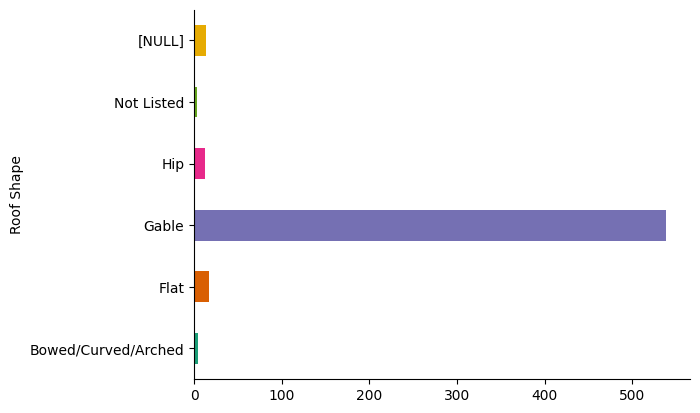

In [4]:
# @title Roof Shape

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('Roof Shape').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

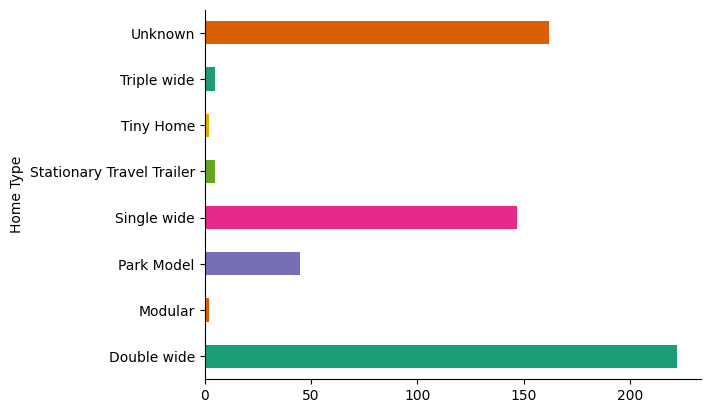

In [5]:
# @title Home Type

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('Home Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

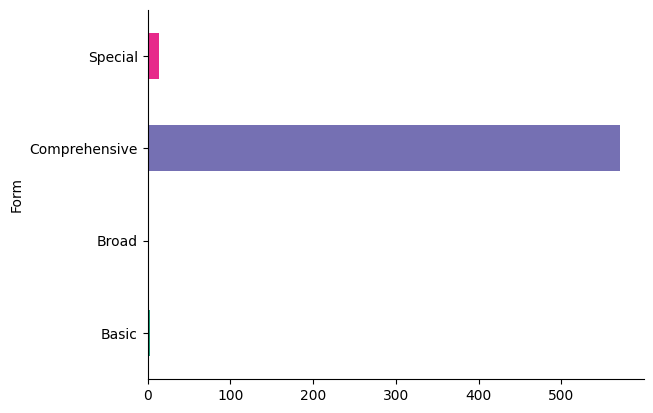

In [6]:
# @title Form

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('Form').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

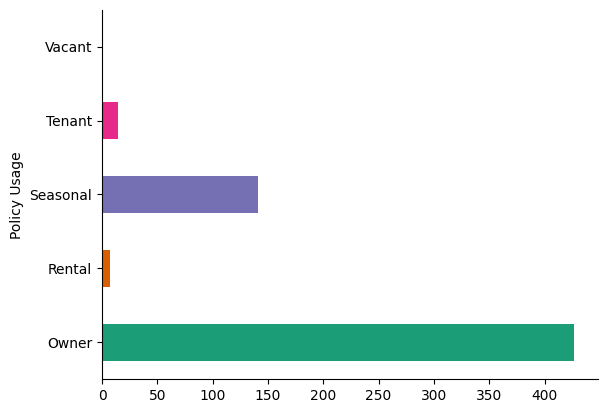

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('Policy Usage').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Data Preprocessing

## Handling Null values and datatypes

In [73]:
#replace string '[NULL]' to null value in dataframe
dataset.replace('[NULL]', np.nan, inplace=True)

# Print the DataFrame after replacement
#print(dataset)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   QUOTE_LOCATOR         590 non-null    int64 
 1   State                 590 non-null    object
 2   City                  590 non-null    object
 3   Address               589 non-null    object
 4   Policy Usage          590 non-null    object
 5   Form                  590 non-null    object
 6   Home Type             590 non-null    object
 7   Roof Shape            576 non-null    object
 8   Roof Condition        576 non-null    object
 9   Model Year            576 non-null    object
 10  Total Square Footage  576 non-null    object
 11  ACV                   576 non-null    object
 12  RCV                   576 non-null    object
 13  Issued Flag           590 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 64.7+ KB


On observing Total Square Footage', 'ACV', 'RCV' columns which are in 'object' data type, the below code converts these numerical columns into appropriate 'int64' i.e. integer datatype.

In [76]:
# List of columns to convert to int64
columns_to_convert = ['Total Square Footage', 'ACV', 'RCV']

# Loop through each column and convert its values to int64
for col in columns_to_convert:
  # Convert NaN values to a placeholder value (e.g., 0)
    dataset[col].fillna(0, inplace=True)
    #convert object to int datatype
    dataset[col] = dataset[col].astype('int64')

# Print the DataFrame after conversion
#print(dataset)


In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   QUOTE_LOCATOR         590 non-null    int64 
 1   State                 590 non-null    object
 2   City                  590 non-null    object
 3   Address               589 non-null    object
 4   Policy Usage          590 non-null    object
 5   Form                  590 non-null    object
 6   Home Type             590 non-null    object
 7   Roof Shape            590 non-null    object
 8   Roof Condition        590 non-null    object
 9   Model Year            590 non-null    object
 10  Total Square Footage  590 non-null    int64 
 11  ACV                   590 non-null    int64 
 12  RCV                   590 non-null    int64 
 13  Issued Flag           590 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 64.7+ KB


On observing few null values in 'Roof Shape', 'Roof Condition', 'Model Year' columns in previous cell output, the below code converts null values into respective default values in the columns.

In [78]:
# List the columns to replace null values
columns_to_replace = ['Roof Shape', 'Roof Condition']

# Replace null values with 'Not Listed' in specified columns
for col in columns_to_replace:
    dataset[col].fillna('Not Listed', inplace=True)

dataset['Model Year'].fillna('2299', inplace=True)

# Print the DataFrame after replacement
#print(dataset)

We dont observe any null values except for column'Address'. But we will not be using 'Address' column as a feature in our model, hence the column will be dropped.

In [79]:
#checking for nulls
dataset.isnull().sum()

QUOTE_LOCATOR           0
State                   0
City                    0
Address                 1
Policy Usage            0
Form                    0
Home Type               0
Roof Shape              0
Roof Condition          0
Model Year              0
Total Square Footage    0
ACV                     0
RCV                     0
Issued Flag             0
dtype: int64

In [14]:
dataset.describe()

,QUOTE_LOCATOR,Total Square Footage,ACV,RCV,Issued Flag
count,5.900000e+02,590.000000,590.000000,590.000000,590.000000
mean,1.091883e+08,1159.050847,30745.538983,111005.637288,0.166102
std,1.604042e+06,586.476739,23209.889862,56065.166760,0.372488
min,1.006896e+08,0.000000,0.000000,0.000000,0.000000
25%,1.077649e+08,720.000000,14599.000000,72324.500000,0.000000
50%,1.091215e+08,1152.000000,22960.500000,105123.000000,0.000000
75%,1.108928e+08,1500.000000,42026.750000,147070.250000,0.000000
max,1.117200e+08,3192.000000,144686.000000,358293.000000,1.000000


##One Hot Encoding
One-hot encoding is typically performed on categorical variables in a dataset to convert them into a numerical format that can be used as input features in a machine learning model.

> Many machine learning algorithms, especially those implemented in libraries like scikit-learn or TensorFlow, require numerical input data.

>Categorical variables, such as 'State', 'City', 'Policy Usage', etc., are non-numeric, so they need to be converted into numeric format for the model to understand and process them.

## Feature Selection

In [15]:
#from sklearn.preprocessing import OneHotEncoder

# List of categorical columns for one-hot encoding
categorical_columns = ['State', 'City', 'Policy Usage', 'Form', 'Home Type', 'Roof Shape', 'Roof Condition']
categorical_columns

['State',
 'City',
 'Policy Usage',
 'Form',
 'Home Type',
 'Roof Shape',
 'Roof Condition']

In [16]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(dataset[categorical_columns])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [80]:
# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded DataFrame with the original DataFrame, dropping the original categorical columns
data_encoded = pd.concat([dataset.drop(columns=categorical_columns), encoded_df], axis=1)

# Print the encoded DataFrame
print("Encoded DataFrame:")
display(data_encoded)

Encoded DataFrame:


,QUOTE_LOCATOR,Address,Model Year,Total Square Footage,ACV,RCV,Issued Flag,State_AR,State_AZ,State_GA,...,Roof Shape_Flat,Roof Shape_Gable,Roof Shape_Hip,Roof Shape_Not Listed,Roof Condition_Fair,Roof Condition_Good,Roof Condition_Not Listed,Roof Condition_Poor,Roof Condition_Severe,Roof Condition_Unknown
0,100689574,10220 East Apache Trail,1968,780,17156,96138,1,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,106067788,8938 S Ash St,2007,1620,54370,135041,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,106170568,5001 E Maint St,1986,320,6418,45818,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,106135316,309 N Misty Ln,1985,1296,21925,113826,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,106146174,5232 E Broadway Rd,1995,1500,28834,154983,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,111675928,11201 N El Mirage Rd,2012,1200,71859,148953,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
586,111680300,13650 N Frontage Rd,2007,399,19663,68645,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
587,111690330,63551 E 293 Rd,1994,1568,22581,129416,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
588,111702582,120 N Val Vista Dr,2001,1456,36212,124962,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#Handling Imbalance Data


In [96]:
zeros_count = np.sum(data_encoded['Issued Flag'] == 0)
ones_count = np.sum(data_encoded['Issued Flag'] == 1)

print("Counts of 0s and 1s in y_test:")
print("0s:", zeros_count)
print("1s:", ones_count)

imbalance_ratio_predictor_class= round(ones_count/(ones_count+zeros_count)*100,2)
print("Counts of 0s and 1s in imbalance_ratio_predictor_class:",imbalance_ratio_predictor_class,"%")


Counts of 0s and 1s in y_test:
0s: 492
1s: 98
Counts of 0s and 1s in imbalance_ratio_predictor_class: 16.61 %


> Only, **17**% of predictor values have 1 , i.e. only 17% of conversion data is present. And remaining 83% of the data has value 0.

> Hence the prediction class is imbalanced. Hence, the model will not be able to predict class 1 and the precision will be very low.

> Balancing to get **40**% of minority class by eliminating some records of majority class[ '0' issued_flag]

In [93]:
# Separate records with 'issued flag' equal to 0 and 1
df_flag_0 = data_encoded[data_encoded['Issued Flag'] == 0]
df_flag_1 = data_encoded[data_encoded['Issued Flag'] == 1]

# Randomly sample 147 records from 'df_flag_0'
df_flag_0_sampled = df_flag_0.sample(n=147, random_state=42)

# Concatenate the sampled 'df_flag_0' with 'df_flag_1'
df_balanced = pd.concat([df_flag_0_sampled, df_flag_1])

# Optional: Shuffle the DataFrame to mix records with 'issued flag' of 0 and 1
#df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
#df_balanced


In [95]:
zeros_count = np.sum(df_balanced['Issued Flag'] == 0)
ones_count = np.sum(df_balanced['Issued Flag'] == 1)

print("Counts of 0s and 1s in y_test:")
print("0s:", zeros_count)
print("1s:", ones_count)

balance_ratio_predictor_class= round(ones_count/(ones_count+zeros_count)*100,2)
print("Counts of 0s and 1s after resampling:",balance_ratio_predictor_class,"%")

Counts of 0s and 1s in y_test:
0s: 147
1s: 98
Counts of 0s and 1s after resampling: 40.0 %


> Now, 'df_balanced' contains a balanced dataset with 147 records of 'issued flag' equal to 0 and the same number of records with 'issued flag' equal to 1

## Train test split

In [97]:
#list(df_balanced.columns)

Dropping 'Address','QUOTE_LOCATOR' columns as they cannot be meaningful features for the model to form 'X [feature dataset]'.

Dropping 'Issued Flag' since 'X [feature dataset]' can only contain features and not predictor column.

In [98]:
#input dataset
X = df_balanced.drop(columns=['Address','QUOTE_LOCATOR','Issued Flag'],axis=1)
#X

In [100]:
#target variable
y = df_balanced['Issued Flag']
#y

Splitting input data and target data into train and test data.
In this scenario, we will be considering 80% as the train data [data used to train the model] and 20% as the test data [to test how the trained model is performing on untrained/test data].

In [24]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [101]:
#X_train

In [102]:
#y_train

In [103]:
# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (196, 243)
X_test shape: (49, 243)
y_train shape: (196,)
y_test shape: (49,)


##Checking for class imbalance in X and y datasets

In [110]:
zeros_count_y_test = np.sum(y_test == 0)
ones_count_y_test = np.sum(y_test == 1)

print("Counts of 0s and 1s in y_test:")
print("0s:", zeros_count_y_test)
print("1s:", ones_count_y_test)

imbalance_ratio_y_test= round(ones_count_y_test/(ones_count_y_test+zeros_count_y_test)*100,0)

print(imbalance_ratio_y_test,"% of quotes are converted into policies in test data")
print(100-imbalance_ratio_y_test,"% of quotes are not converted into policies in test data")

Counts of 0s and 1s in y_test:
0s: 27
1s: 22
45.0 % of quotes are converted into policies in test data
55.0 % of quotes are not converted into policies in test data


**Since 55% of the quotes are not converted, the naive baseline of the model [minimum accuracy any model should predict] will be 55% on test data prediction.**

In [107]:
zeros_count_y_train = np.sum(y_train == 0)
ones_count_y_train = np.sum(y_train == 1)

print("Counts of 0s and 1s in y_train:")
print("0s:", zeros_count_y_train)
print("1s:", ones_count_y_train)

imbalance_ratio_y_train= round(ones_count_y_train/(ones_count_y_train+zeros_count_y_train)*100,2)

print(imbalance_ratio_y_train,"% of quotes are converted into policies in train data")
print(100-imbalance_ratio_y_train,"% of quotes are not converted into policies in train data")

Counts of 0s and 1s in y_train:
0s: 120
1s: 76
38.78 % of quotes are converted into policies in train data
61.22 % of quotes are not converted into policies in train data


Approx 40% of the values in both y train and test datasets for 'Issued Flags' are 0's

# Building the model

## Decision Tree Classification

In [32]:
#from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf_dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_dt = clf_dt.fit(X_train,y_train)
clf_dt

DecisionTreeClassifier()

Accuracy: 69.39 %
Precision: 76.92 %
Recall: 45.45 %


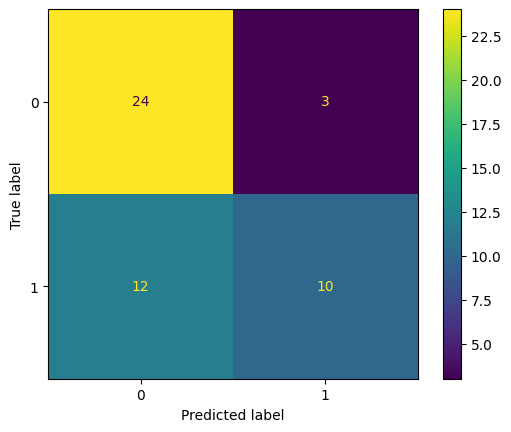

In [66]:
#predict and print confusion matrix, accuracy, precision and recall scores
metrics_calc(clf_dt, X_test, y_test)

###Model Summary
- Since accuracy is around 70%, which is way above the naive baseline which is 55%. Hence the accuracy is considerable good.
- Precision is around 77%, which ,means that 77% quotes that are actually converted are predicted as converted.

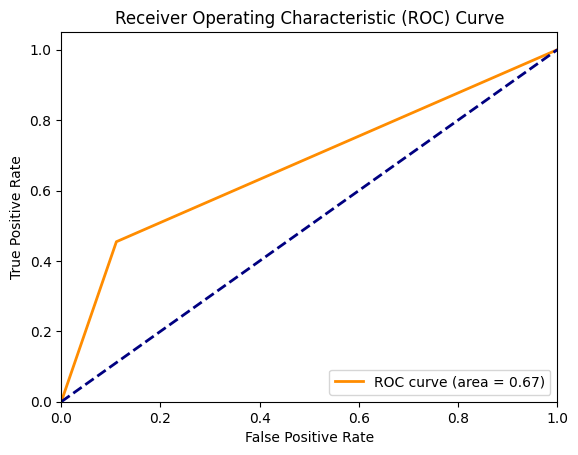

An AUC value of 0.67 indicates that the decision tree model performs better than random guessing (which would yield an AUC of 0.55 based on naive baseline). This means the decision tree model is able to correctly classify instances more often than by chance alone.

## Random forest classification

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

#training the model
rf_clf = rf_clf.fit(X_train, y_train)
rf_clf

RandomForestClassifier()

Accuracy: 59.18 %
Precision: 60.0 %
Recall: 27.27 %


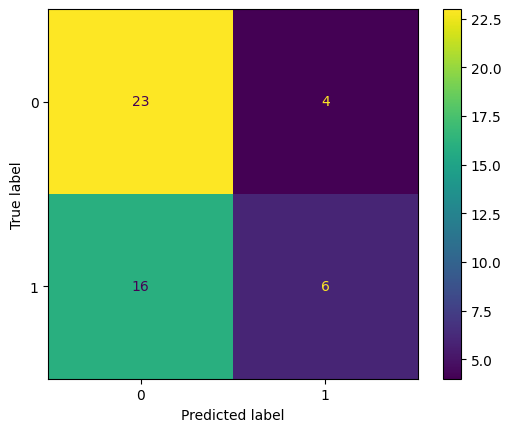

In [ ]:
#predict and print confusion matrix, accuracy, precision and recall scores
metrics_calc(rf_clf, X_test, y_test)

###Model Summary
- Since accuracy is around 59%, which suggests that the model's predictive performance is slightly better than random guessing. However, it may still not be sufficient for some applications and further improvements could be explored.
- Precision is around 60%, which means that approximately 60% of the quotes predicted as converted by the model are actually converted in reality.

## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# LogisticRegression
lr = LogisticRegression(random_state=0)
lr = lr.fit(X_train, y_train)
lr

LogisticRegression(random_state=0)

Accuracy: 51.02 %
Precision: 0.0 %
Recall: 0.0 %


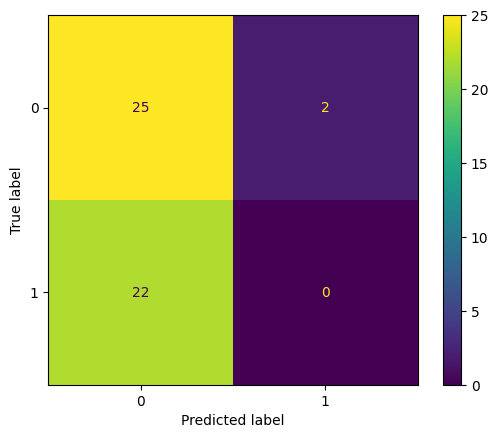

In [70]:
#predict and print confusion matrix, accuracy, precision and recall scores
metrics_calc(lr, X_test, y_test)

###Model Summary
- Since accuracy is around 51%, which is below the naive baseline which is 55%. Hence the accuracy is suggesting model's predictive performance is worse.
- Precision is around 0%, which indicates that none of the quotes predicted as converted by the model are actually converted. This model is unable to predict true class.

# Conclusion

## ROC Curve

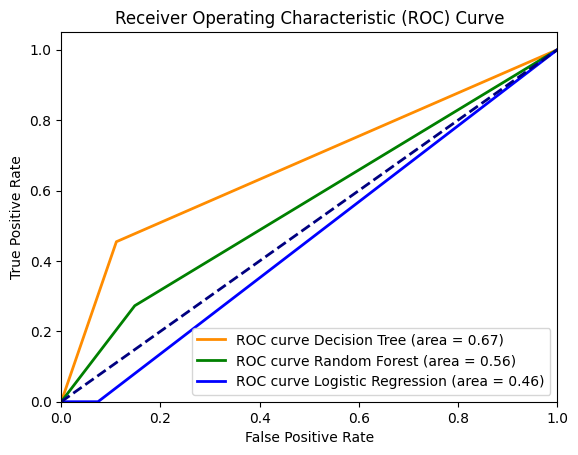

In [123]:
#from sklearn.metrics import roc_curve, auc
#import matplotlib.pyplot as plt

# Assuming 'y_test' are the true labels and 'y_pred_prob' are the predicted probabilities
# Replace 'y_test' and 'y_pred_prob' with your actual true labels and predicted probabilities

# Predictions for different classifiers
y_pred_dt = clf_dt.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_lr = lr.predict(X_test)

# Compute ROC curve and ROC area for each classifier
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curves
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve Decision Tree (area = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='ROC curve Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='ROC curve Logistic Regression (area = %0.2f)' % roc_auc_lr)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Final Model : 🎉**Decision Tree Classifier**🎉
Considering an ROC of 67%, accuracy of 70%, and precision of 77% for the **Decision Tree Model**, it suggests that the decision tree model outperforms other models in terms of precision and accuracy, which is a crucial metric for this specific business problem.

An ROC of 67% indicates moderate discrimination ability, suggesting that the decision tree performs reasonably well in distinguishing between the two classes.

# Appendix

###Optimizing Decision Tree model by performing hyperparameter tuning.
criterion : optional (default=”gini”) or Choose attribute selection measure. This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

splitter : string, optional (default=”best”) or Split Strategy. This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depth : int or None, optional (default=None) or Maximum Depth of a Tree. The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source

In [ ]:
# Create Decision Tree classifer object
clf_dt_cv = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf_dt_cv = clf_dt_cv.fit(X_train,y_train)
clf_dt_cv

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Accuracy: 57.14 %
Precision: 66.67 %
Recall: 9.09 %


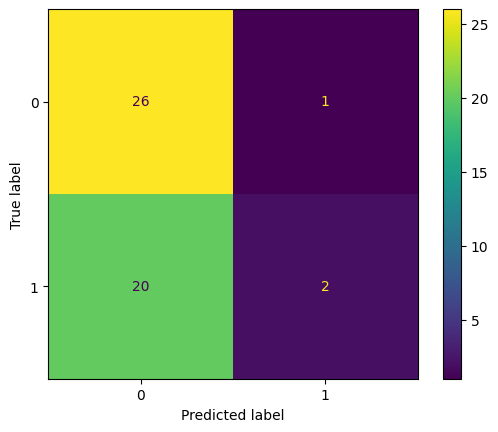

In [ ]:
#predict and print confusion matrix, accuracy, precision and recall scores
metrics_calc(clf_dt_cv, X_test, y_test)

### Optimization of RF model using hyperparameter tuning

In [118]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c715a325090>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c715b905030>})

In [119]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 18, 'n_estimators': 371}


Accuracy: 57.14 %
Precision: 55.56 %
Recall: 22.73 %


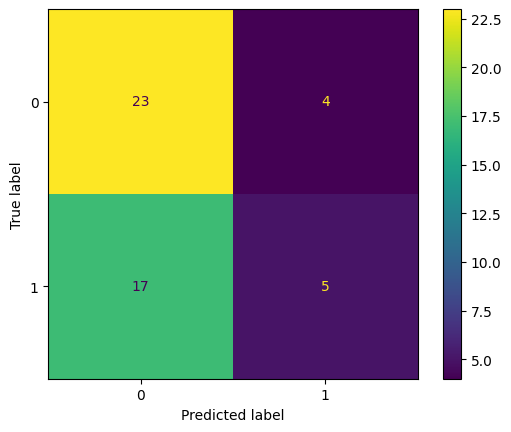

In [120]:
#predict and print confusion matrix, accuracy, precision and recall scores
metrics_calc(best_rf, X_test, y_test)

In [ ]:
#Check for overfitting
#metrics_calc(best_rf, X_train, y_train)

###Optimizing Logistic Regression by performing hyperparameter tuning.

We define a grid of hyperparameters param_grid containing different values for the regularization parameter C and regularization penalty penalty.

We create a Logistic Regression classifier clf with random_state=0.

GridSearchCV to perform grid search with 5-fold cross-validation (cv=5) and accuracy as the scoring metric (scoring='accuracy').

After fitting the grid search object to the training data, we print the best hyperparameters and the corresponding test accuracy achieved by the best model.

max_iter: maximum no of iterations to run

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'max_iter': [100, 200, 300] ## Maximum number of iterations
}

In [ ]:
# Create the Logistic Regression classifier
lr_ht = LogisticRegression(random_state=42)

lr_ht

LogisticRegression(random_state=42)

In [ ]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(lr_ht, param_grid, cv=3, scoring='accuracy')
grid_search = grid_search.fit(X_train, y_train)

grid_search

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
54 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}


In [ ]:
# Get the best model
best_model = grid_search.best_estimator_
best_model

LogisticRegression(C=0.1, random_state=42)

Accuracy: 51.02 %
Precision: 0.0 %
Recall: 0.0 %


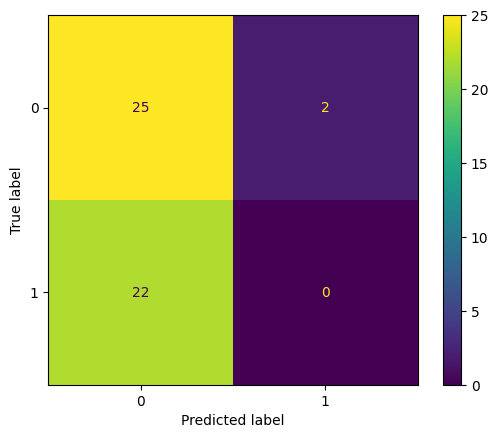

In [ ]:
#predict and print confusion matrix, accuracy, precision and recall scores
metrics_calc(best_model, X_test, y_test)